In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline


In [53]:

#from google.colab import drive
#drive.mount('/content/drive')

In [54]:
df=pd.read_pickle("./LSWMD_wafer_data.pkl")


In [55]:
df.head(30)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,6.0,[[Training]],[[none]]
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,7.0,[[Training]],[[none]]
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,8.0,[[Training]],[[none]]
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,9.0,[[Training]],[[none]]
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,10.0,[[Training]],[[none]]


In [56]:
df.tail(30)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811427,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47541,23.0,[[Test]],[[Scratch]]
811428,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,...",600.0,lot47541,24.0,[[Test]],[[Edge-Loc]]
811429,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47541,25.0,[[Test]],[[none]]
811430,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2,...",600.0,lot47542,1.0,[[Test]],[[none]]
811431,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,2.0,[[Test]],[[none]]
811432,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,3.0,[[Test]],[[Edge-Ring]]
811433,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,4.0,[[Test]],[[none]]
811434,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,5.0,[[Test]],[[none]]
811435,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,6.0,[[Test]],[[none]]
811436,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,7.0,[[Test]],[[none]]


In [57]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1

df['waferMapDim']=df.waferMap.apply(find_dim)

In [58]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
df=df.replace({'failureNum':mapping_type})

/home/sathvik/.conda/envs/sathvik/lib/python3.9/site-packages/pandas/core/array_algos/replace.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [59]:
df.head(30)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,6.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,7.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,8.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,9.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,10.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]


In [60]:
df.tail(30)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
811427,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47541,23.0,[[Test]],[[Scratch]],"(26, 30)",6,[[Test]]
811428,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,...",600.0,lot47541,24.0,[[Test]],[[Edge-Loc]],"(26, 30)",2,[[Test]]
811429,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47541,25.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
811430,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2,...",600.0,lot47542,1.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
811431,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,2.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
811432,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,3.0,[[Test]],[[Edge-Ring]],"(26, 30)",3,[[Test]]
811433,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,4.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
811434,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,5.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
811435,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,6.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
811436,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,7.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]


In [61]:
print(max(df.waferMapDim), min(df.waferMapDim))
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
print("No of Unique wafer dimensions",uni_waferDim[0].shape)
print("Total number of wafer's present in the dataset:", len(df))


(300, 202) (6, 21)
No of Unique wafer dimensions (632,)
Total number of wafer's present in the dataset: 811457


In [62]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()

df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df[(df['failureNum']==8)]
print("Total number of wafers with labels:",df_withlabel.shape[0] )
print("Total number of wafers with pattern:",df_withpattern.shape[0])
print("Total number of wafers without any defect patterns:",df_nonpattern.shape[0] )

Total number of wafers with labels: 172950
Total number of wafers with pattern: 25519
Total number of wafers without any defect patterns: 147431


In [63]:
df_withlabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172950 entries, 0 to 172949
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           172950 non-null  int64  
 1   waferMap        172950 non-null  object 
 2   dieSize         172950 non-null  float64
 3   lotName         172950 non-null  object 
 4   waferIndex      172950 non-null  float64
 5   trianTestLabel  172950 non-null  object 
 6   failureType     172950 non-null  object 
 7   waferMapDim     172950 non-null  object 
 8   failureNum      172950 non-null  object 
 9   trainTestNum    172950 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 13.2+ MB


In [64]:
df_withlabel.tail(30)

,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
172920,811425,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47541,21.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
172921,811426,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47541,22.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
172922,811427,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47541,23.0,[[Test]],[[Scratch]],"(26, 30)",6,[[Test]]
172923,811428,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,...",600.0,lot47541,24.0,[[Test]],[[Edge-Loc]],"(26, 30)",2,[[Test]]
172924,811429,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47541,25.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
172925,811430,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2,...",600.0,lot47542,1.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
172926,811431,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,2.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
172927,811432,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,3.0,[[Test]],[[Edge-Ring]],"(26, 30)",3,[[Test]]
172928,811433,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,4.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]
172929,811434,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,5.0,[[Test]],[[none]],"(26, 30)",8,[[Test]]


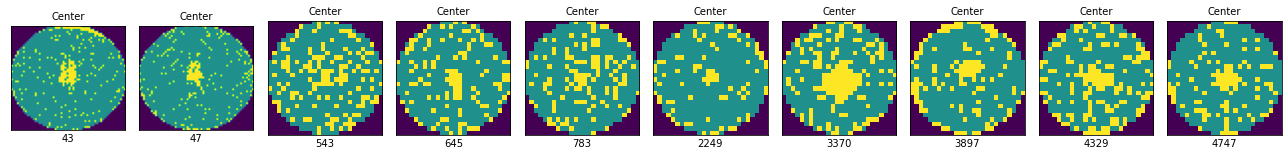

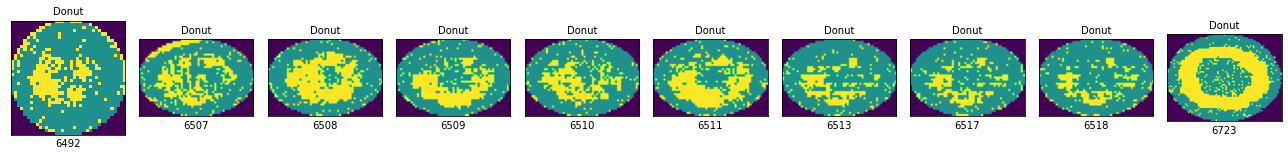

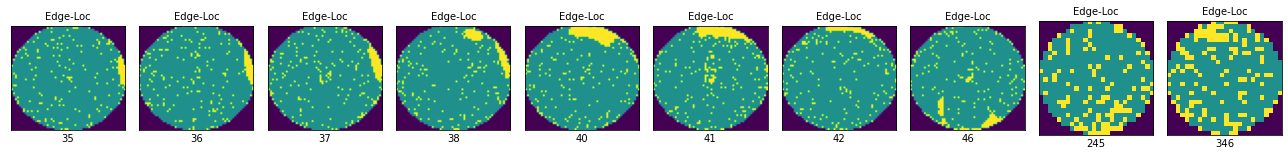

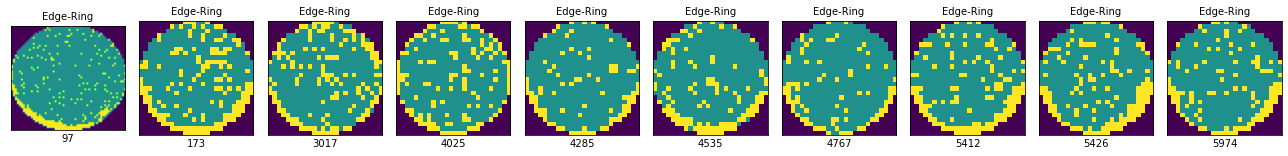

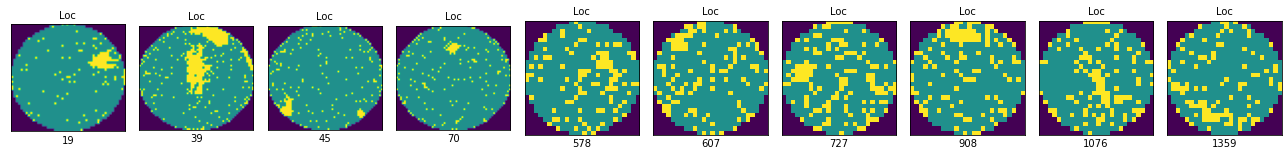

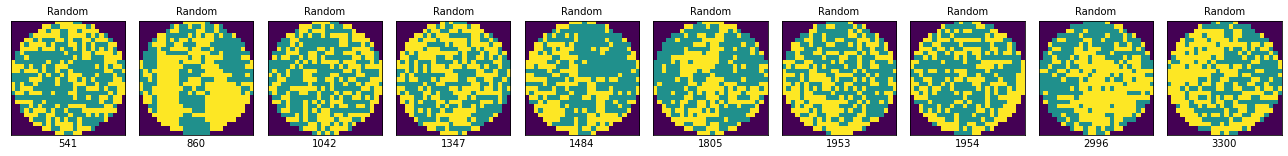

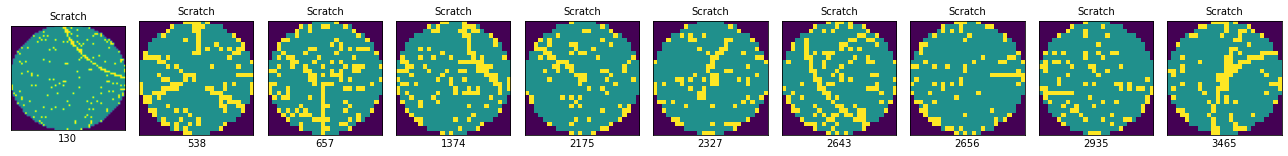

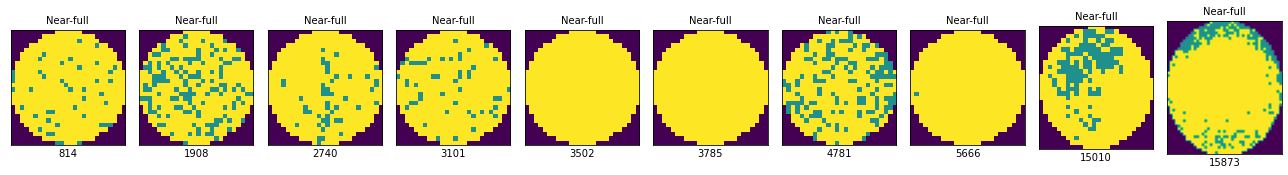

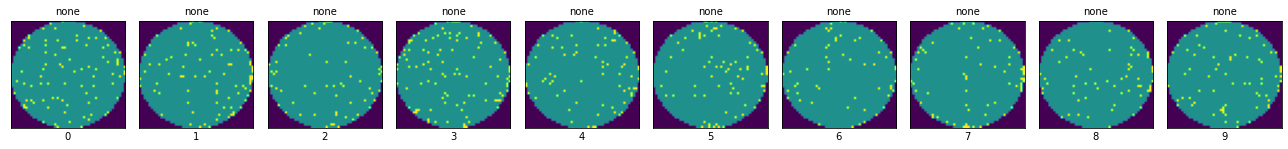

In [65]:
x = [0,1,2,3,4,5,6,7,8]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full','none']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.flatten(order='C')
    for j in [k]:
        img = df_withlabel.waferMap[df_withlabel.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_withlabel.failureType[img.index[i]][0][0], fontsize=10)
            ax[i].set_xlabel(df_withlabel.index[img.index[i]], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

In [66]:
df_withlabel.head()

,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],"(45, 48)",8,[[Training]]


In [67]:
dim_list =[(x, x) for x in range(20, 50,1)]
for i in dim_list:
    print(f"count of images with {i} dimension :", end =" ")
    print(df_withlabel[(df.waferMapDim ==i) & (df.waferMapDim[0] == df.waferMapDim[1])].count()["waferMapDim"])

count of images with (20, 20) dimension : 0
count of images with (21, 21) dimension : 0
count of images with (22, 22) dimension : 0
count of images with (23, 23) dimension : 0
count of images with (24, 24) dimension : 

/tmp/ipykernel_297476/2747067816.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_withlabel[(df.waferMapDim ==i) & (df.waferMapDim[0] == df.waferMapDim[1])].count()["waferMapDim"])


0
count of images with (25, 25) dimension : 0
count of images with (26, 26) dimension : 14908
count of images with (27, 27) dimension : 26
count of images with (28, 28) dimension : 100
count of images with (29, 29) dimension : 184
count of images with (30, 30) dimension : 208
count of images with (31, 31) dimension : 321
count of images with (32, 32) dimension : 68
count of images with (33, 33) dimension : 7464
count of images with (34, 34) dimension : 1808
count of images with (35, 35) dimension : 0
count of images with (36, 36) dimension : 1566
count of images with (37, 37) dimension : 50
count of images with (38, 38) dimension : 88
count of images with (39, 39) dimension : 25
count of images with (40, 40) dimension : 2163
count of images with (41, 41) dimension : 1876
count of images with (42, 42) dimension : 25
count of images with (43, 43) dimension : 346
count of images with (44, 44) dimension : 3657
count of images with (45, 45) dimension : 579
count of images with (46, 46) dime

In [68]:
 df_withlabel["failureNum"].value_counts()

8    147431
3      9680
2      5189
0      4294
4      3593
6      1193
5       866
1       555
7       149
Name: failureNum, dtype: int64

In [69]:
df2 = df_withlabel.loc[df_withlabel['waferMapDim'] >= (26, 26)]
df2.reset_index(drop= True, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149082 entries, 0 to 149081
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           149082 non-null  int64  
 1   waferMap        149082 non-null  object 
 2   dieSize         149082 non-null  float64
 3   lotName         149082 non-null  object 
 4   waferIndex      149082 non-null  float64
 5   trianTestLabel  149082 non-null  object 
 6   failureType     149082 non-null  object 
 7   waferMapDim     149082 non-null  object 
 8   failureNum      149082 non-null  object 
 9   trainTestNum    149082 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.4+ MB


In [70]:
df2["failureNum"].value_counts()

8    126806
3      9576
2      4717
4      3353
0      2014
6      1151
5       786
1       554
7       125
Name: failureNum, dtype: int64

In [71]:
df2.tail()


,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
149077,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,[[Test]],[[Edge-Loc]],"(26, 30)",2,[[Test]]
149078,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,[[Test]],[[Edge-Loc]],"(26, 30)",2,[[Test]]
149079,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]],"(26, 30)",3,[[Test]]
149080,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]],"(26, 30)",2,[[Test]]
149081,811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]],"(26, 30)",3,[[Test]]


In [72]:
df3 = df2.drop(['index','dieSize','lotName','waferIndex','trianTestLabel','failureType','trainTestNum'], axis =1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149082 entries, 0 to 149081
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   waferMap     149082 non-null  object
 1   waferMapDim  149082 non-null  object
 2   failureNum   149082 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


In [73]:
# Also in the failurNum column there are certain dummy empty numpy arrays
df3

,waferMap,waferMapDim,failureNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(45, 48)",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(45, 48)",8
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(45, 48)",8
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(45, 48)",8
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(45, 48)",8
...,...,...,...
149077,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...","(26, 30)",2
149078,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...","(26, 30)",2
149079,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...","(26, 30)",3
149080,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...","(26, 30)",2


In [74]:
data = { 'req_waferMap':[],
         'wafer_dimension':[],
          'failure_num':[] }

#Appending only the square shaped dimension images
for i, row in df3.iterrows():
    if df3["waferMapDim"][i][0] == df3["waferMapDim"][i][1]:
        data['req_waferMap'].append(df3["waferMap"][i])
        data['wafer_dimension'].append(df3["waferMapDim"][i])
        data['failure_num'].append(df3["failureNum"][i])
 

'  \nfor i, row in df3.iterrows():\n    data[\'req_waferMap\'].append(df3["waferMap"][i])\n    data[\'wafer_dimension\'].append(df3["waferMapDim"][i])\n    data[\'failure_num\'].append(df3["failureNum"][i])\n'

In [75]:
df4 = pd.DataFrame.from_dict(data)
print("number of square wafer unique dimensions", df4['wafer_dimension'].nunique())
print("Total number of data remaining =========>", len(df4))
df4.info(30)

number of square wafer unique dimensions 37
Total number of data remaining =========> 22894
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   req_waferMap     22894 non-null  object
 1   wafer_dimension  22894 non-null  object
 2   failure_num      22894 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 536.7+ KB


In [76]:
df4.tail()

,req_waferMap,wafer_dimension,failure_num
22889,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8
22890,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8
22891,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8
22892,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8
22893,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8


In [77]:
# image with pixel values 0 - 2 is normalized to 0 -1
df4['normalized_wafer'] = df4.copy().loc[:,('req_waferMap')].apply( lambda x : (x - x.min())/(x.max()-x.min()) ) 
df4.tail()

,req_waferMap,wafer_dimension,failure_num,normalized_wafer
22889,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
22890,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
22891,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
22892,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
22893,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...","(37, 37)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [78]:
print("Max and Min values before normalization",df4['req_waferMap'][0].max() ,",", df4['req_waferMap'][0].min())


Max and Min values before normalization 2 , 0


In [79]:
print("Max and Min values after normalization",df4['normalized_wafer'][0].max() ,",", df4['normalized_wafer'][0].min())

Max and Min values after normalization 1.0 , 0.0


In [80]:
df4.head()

,req_waferMap,wafer_dimension,failure_num,normalized_wafer
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...","(26, 26)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...","(26, 26)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...","(26, 26)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...","(26, 26)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...","(26, 26)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [81]:
df4.isnull().sum()

req_waferMap        0
wafer_dimension     0
failure_num         0
normalized_wafer    0
dtype: int64

In [82]:
type_count = df4["failure_num"].value_counts(ascending=True)
key = type_count.keys()
print(type_count)
print(type_count.keys())
print(type_count[key[-2]])
print(type_count[key[-1]])
print(key[2])

1       14
7       32
6      165
5      282
4      634
2      680
0      803
3     1093
8    19191
Name: failure_num, dtype: int64
Int64Index([1, 7, 6, 5, 4, 2, 0, 3, 8], dtype='int64')
1093
19191
6


In [83]:
def augment(image, pattern, bal_data):
    bal_data.append((image, pattern))
    bal_data.append((rotate(image, angle= 90), pattern))
    bal_data.append((rotate(image, angle= 180), pattern))
    bal_data.append((rotate(image, angle= 270), pattern))
    bal_data.append((np.fliplr(image), pattern))
    bal_data.append((np.flipud(image), pattern)) #Up Down Flipped
    bal_data.append((random_noise(image,var=0.005**2), pattern))
    bal_data.append((ndimage.uniform_filter(image, size=0.3),pattern))
    bal_data.append((exposure.adjust_gamma(image, gamma=0.3,gain=1), pattern))  #bright image
    bal_data.append((exposure.adjust_gamma(image, gamma=0.5,gain=1), pattern))
    bal_data.append((exposure.adjust_gamma(image, gamma=1,gain =1), pattern))     #dark image
    bal_data.append((exposure.adjust_gamma(image, gamma=1.5,gain =1), pattern))  #darker image
    bal_data.append((random_noise(image,var=0.005**2), pattern))
    return bal_data

In [84]:
from skimage.transform import rotate
from skimage import exposure
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

for i in key:
    globals()[f"bal_data_{i}"] = []
    for j, row in df4.iterrows():
        image = df4["normalized_wafer"][j]
        pattern =  df4["failure_num"][j]
        if pattern == i:
             while len( globals()[f"bal_data_{i}"]) <= type_count[key[-2]]:
                augment(image, pattern, globals()[f"bal_data_{i}"])
    print(f"forpattern {i}")
    print(len(globals()[f"bal_data_{i}"]))
          

    
    


forpattern 1
1105
forpattern 7
1105
forpattern 6
1105
forpattern 5
1105
forpattern 4
1105
forpattern 2
1105
forpattern 0
1105
forpattern 3
1105
forpattern 8
1105


(-0.5, 36.5, 36.5, -0.5)

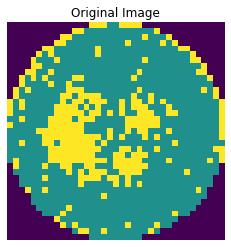

In [85]:
from skimage.transform import resize

plt.imshow(bal_data_1[0][0])
plt.title("Original Image")
plt.axis('off')

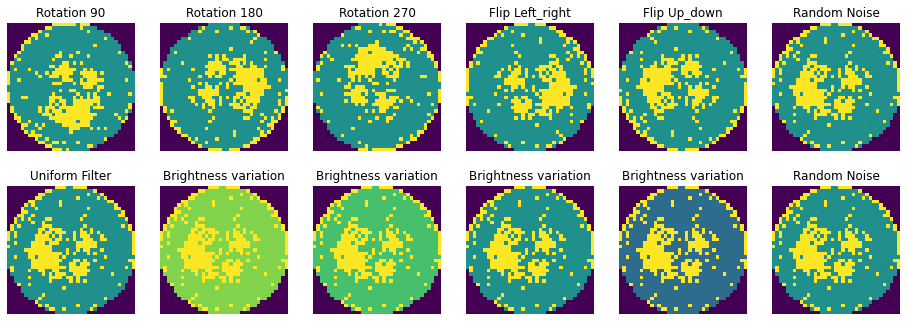

In [86]:
from skimage.transform import resize
width=5
height=5
rows = 2
cols = 6
axes=[]
fig=plt.figure(figsize=(16, 5.5))
augmentations = [ 'Rotation 90','Rotation 180', 'Rotation 270', 'Flip Left_right','Flip Up_down', 'Random Noise','Uniform Filter',
                   'Brightness variation', 'Brightness variation', 'Brightness variation','Brightness variation','Random Noise']

for a in range(rows*cols):
    #img = resize(bal_data_1[a + 1][0], (26, 26))
    img = bal_data_1[a+1][0]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=augmentations[a]
    axes[-1].set_title(subplot_title)  
    plt.imshow(img)
    plt.axis('off')
#fig.tight_layout()    
plt.show()

In [87]:
print(bal_data_0[0][1])
print(bal_data_1[0][1])
print(bal_data_2[0][1])
print(bal_data_3[0][1])
print(bal_data_4[0][1])
print(bal_data_5[0][1])
print(bal_data_6[0][1])
print(bal_data_7[0][1])
print(bal_data_8[0][1])

0
1
2
3
4
5
6
7
8


In [88]:
final_bal_data = bal_data_0 + bal_data_1 + bal_data_2 + bal_data_3 + bal_data_4 + bal_data_5 \
                   + bal_data_6 + bal_data_7 +bal_data_8
print(len(final_bal_data ))

9945


In [89]:
print(type(final_bal_data[1105][0]))

<class 'numpy.ndarray'>


In [90]:
import random

random.shuffle(final_bal_data )

for i in range(10):
    print(final_bal_data[i][1])

7
3
3
3
4
0
2
5
7
2


In [91]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((26,26)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip()
])

Data_tensor_list =[]
for i in range(len(final_bal_data)):
    image = transform(final_bal_data[i][0].copy())
    pattern = torch.tensor(final_bal_data[i][1])
    Data_tensor_list.append((image, pattern))
    
print(len(Data_tensor_list))

9945


In [92]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [93]:
batch_size_train = 6
batch_size_val =6
learning_rate = 0.001
momentum = 0.9
random_seed = 2
torch.manual_seed(random_seed) 

In [94]:
train_data, val_data = train_test_split(Data_tensor_list, test_size=0.06, random_state=42, shuffle=True)

In [95]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size_train, shuffle=True)
val_loader = Data.DataLoader(dataset=val_data, batch_size=batch_size_val, shuffle=True)

In [96]:
print(len(train_data))
print(len(val_data))


9348
597


torch.Size([1, 26, 26])


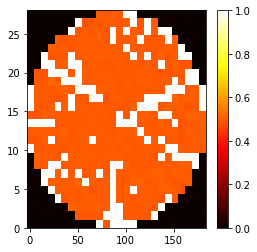

In [97]:
examples = enumerate(train_loader)
i, (example_data, pattern) = next(examples)
print(example_data[0].shape)       
fig, axis = plt.subplots(1, 1, figsize=(4,4))
dx, dy = 0.5 * 180.0 / 28, 0.5 / 28
im = axis.imshow(example_data[0][0], cmap='hot',
        extent=(-dx, 180.0 + dx, -dy, 28 + dy),
        aspect='auto')
fig.colorbar(im)


In [98]:
import torch.nn.functional as F
import torch.optim as optim

In [99]:
class convautoencoder(nn.Module):
    def __init__(self):
        super(convautoencoder, self).__init__()
        #Encoder                              #I/p dim = 26 * 26   
        self.conv1 = nn.Conv2d(1, 300, 5)     #O/p dim = 22 * 22
        self.conv2 = nn.Conv2d(300, 200, 5)   #O/p dim = 18 * 18
        self.conv3 = nn.Conv2d(200, 100 ,5)   #O/p dim = 14 * 14
        self.conv4 = nn.Conv2d(100, 50 ,5)   #O/p dim = 10 * 10
        self.conv5 = nn.Conv2d(50, 30 ,5)   #O/p dim = 6 * 6
        self.conv6 = nn.Conv2d(30, 10 ,6)   #O/p dim = 1 * 1


        # decoder                                                 #I/p dim = 1 * 1  
        self.t_conv1 = nn.ConvTranspose2d(10, 30, 6, stride=1)  #O/p dim = 6 * 6
        self.t_conv2 = nn.ConvTranspose2d(30, 50, 5, stride=1)  #O/p dim = 10 *10
        self.t_conv3 = nn.ConvTranspose2d(50, 100, 5, stride=1)  #O/p dim = 14 * 14
        self.t_conv4 = nn.ConvTranspose2d(100, 200, 5, stride=1)  #O/p dim = 18 * 18
        self.t_conv5 = nn.ConvTranspose2d(200, 300, 5, stride=1)  #O/p dim = 22 * 22
        self.t_conv6 = nn.ConvTranspose2d(300, 1, 5, stride=1)    #O/p dim = 26 * 26



    def forward(self, x):                                   
        ## encode ##
        #print("ok")                                 
        x = F.relu(self.conv1(x))
        #print("pool1",x.shape)
        x = F.relu(self.conv2(x)) 
        x = F.relu(self.conv3(x))  
        x = F.relu(self.conv4(x)) 
        x = F.relu(self.conv5(x))  
        encoded = self.conv6(x)

        x = F.relu(self.t_conv1(encoded))
        x = F.relu(self.t_conv2(x))
        x = F.relu(self.t_conv3(x))
        x = F.relu(self.t_conv4(x))
        x = F.relu(self.t_conv5(x))
        decoded = torch.sigmoid(self.t_conv6(x))
       

        return encoded, decoded    
    
    
    

"""
# define the NN architecture
class convautoencoder(nn.Module):
    def __init__(self):
        super(convautoencoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 60, 5)
        self.conv2 = nn.Conv2d(60, 50, 5)
        self.conv3 = nn.Conv2d(50, 40 ,5)
        self.conv4 = nn.Conv2d(40, 30 ,5)
        self.conv5 = nn.Conv2d(30, 20 ,5)
        self.conv6 = nn.Conv2d(20, 10 ,6)


        ## decoder layers ##
        #Transposed_conv_Dim = (D -1)*s-2p+(k-1) +output_padding + 1
        self.t_conv1 = nn.ConvTranspose2d(10, 20, 6, stride=1)
        self.t_conv2 = nn.ConvTranspose2d(20, 30, 5, stride=1)
        self.t_conv3 = nn.ConvTranspose2d(30, 40, 5, stride=1)
        self.t_conv4 = nn.ConvTranspose2d(40, 50, 5, stride=1)
        self.t_conv5 = nn.ConvTranspose2d(50, 60, 5, stride=1)
        self.t_conv6 = nn.ConvTranspose2d(60, 1, 5, stride=1)



    def forward(self, x):                                   
        ## encode ##
        #print("ok")                                 
        x = F.relu(self.conv1(x))
        #print("pool1",x.shape)
        x = F.relu(self.conv2(x)) 
        x = F.relu(self.conv3(x))  
        x = F.relu(self.conv4(x)) 
        x = F.relu(self.conv5(x))  
        encoded = self.conv6(x)

        x = F.relu(self.t_conv1(encoded))
        x = F.relu(self.t_conv2(x))
        x = F.relu(self.t_conv3(x))
        x = F.relu(self.t_conv4(x))
        x = F.relu(self.t_conv5(x))
        decoded = torch.sigmoid(self.t_conv6(x))
       

        return encoded, decoded

"""

"""
class convautoencoder(nn.Module):
    def __init__(self):
        super(convautoencoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 30, 5)
        self.conv3 = nn.Conv2d(30, 50 ,5)
        self.conv4 = nn.Conv2d(50, 70 ,5)
        self.conv5 = nn.Conv2d(70, 90 ,5)
        self.conv6 = nn.Conv2d(90, 100 ,6)


        ## decoder layers ##
        #Transposed_conv_Dim = (D -1)*s-2p+(k-1) +output_padding + 1
        self.t_conv1 = nn.ConvTranspose2d(100, 90, 6, stride=1)
        self.t_conv2 = nn.ConvTranspose2d(90, 70, 5, stride=1)
        self.t_conv3 = nn.ConvTranspose2d(70, 50, 5, stride=1)
        self.t_conv4 = nn.ConvTranspose2d(50, 30, 5, stride=1)
        self.t_conv5 = nn.ConvTranspose2d(30, 10, 5, stride=1)
        self.t_conv6 = nn.ConvTranspose2d(10, 1, 5, stride=1)



    def forward(self, x):                                   
        ## encode ##
        #print("ok")                                 
        x = F.relu(self.conv1(x))
        #print("pool1",x.shape)
        x = F.relu(self.conv2(x)) 
        x = F.relu(self.conv3(x))  
        x = F.relu(self.conv4(x)) 
        x = F.relu(self.conv5(x))  
        encoded = self.conv6(x)  

        x = F.relu(self.t_conv1(encoded))
        x = F.relu(self.t_conv2(x))
        x = F.relu(self.t_conv3(x))
        x = F.relu(self.t_conv4(x))
        x = F.relu(self.t_conv5(x))
        decoded = torch.sigmoid(self.t_conv6(x))
       
        return encoded, decoded  

"""
 


'\nclass convautoencoder(nn.Module):\n    def __init__(self):\n        super(convautoencoder, self).__init__()\n        self.conv1 = nn.Conv2d(1, 10, 5)\n        self.conv2 = nn.Conv2d(10, 30, 5)\n        self.conv3 = nn.Conv2d(30, 50 ,5)\n        self.conv4 = nn.Conv2d(50, 70 ,5)\n        self.conv5 = nn.Conv2d(70, 90 ,5)\n        self.conv6 = nn.Conv2d(90, 100 ,6)\n\n\n        ## decoder layers ##\n        #Transposed_conv_Dim = (D -1)*s-2p+(k-1) +output_padding + 1\n        self.t_conv1 = nn.ConvTranspose2d(100, 90, 6, stride=1)\n        self.t_conv2 = nn.ConvTranspose2d(90, 70, 5, stride=1)\n        self.t_conv3 = nn.ConvTranspose2d(70, 50, 5, stride=1)\n        self.t_conv4 = nn.ConvTranspose2d(50, 30, 5, stride=1)\n        self.t_conv5 = nn.ConvTranspose2d(30, 10, 5, stride=1)\n        self.t_conv6 = nn.ConvTranspose2d(10, 1, 5, stride=1)\n\n\n\n    def forward(self, x):                                   \n        ## encode ##\n        #print("ok")                                

In [100]:
autoencoder =convautoencoder()
autoencoder = autoencoder.to(device)
print(autoencoder)
#optimizer = optim.SGD(autoencoder.parameters(), lr=learning_rate,
                      #momentum=momentum)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = learning_rate)
#optimizer = optim.Adam(autoencoder.parameters(), lr = learning_rate, weight_decay = 1e-5 )
#weight_decay = 2e-5
loss_function = nn.MSELoss()
scheduler =  optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)
# original data (first row) for viewing
#view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

convautoencoder(
  (conv1): Conv2d(1, 300, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(300, 200, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(200, 100, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(100, 50, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(50, 30, kernel_size=(5, 5), stride=(1, 1))
  (conv6): Conv2d(30, 10, kernel_size=(6, 6), stride=(1, 1))
  (t_conv1): ConvTranspose2d(10, 30, kernel_size=(6, 6), stride=(1, 1))
  (t_conv2): ConvTranspose2d(30, 50, kernel_size=(5, 5), stride=(1, 1))
  (t_conv3): ConvTranspose2d(50, 100, kernel_size=(5, 5), stride=(1, 1))
  (t_conv4): ConvTranspose2d(100, 200, kernel_size=(5, 5), stride=(1, 1))
  (t_conv5): ConvTranspose2d(200, 300, kernel_size=(5, 5), stride=(1, 1))
  (t_conv6): ConvTranspose2d(300, 1, kernel_size=(5, 5), stride=(1, 1))
)


In [101]:
#training loop
training_losses =[]
validation_losses =[]
epoch_loss_train =[]
epoch_loss_val =[]

Epoch = 50
for epoch in range(1, Epoch + 1):
    #def train(Epoch):
    autoencoder.train()
    running_loss_train = 0.0
    running_loss_val = 0.0
    for batch_idx, (image, pattern) in enumerate(train_loader):
        optimizer.zero_grad()
        image = image.view(-1,1,26,26)
        image = image.float() #Reading images gives integer values
        image = image.to(device)
        encoded, decoded = autoencoder(image)
        #loss = loss_function(torch.reshape(decoded,(-1,1,26,26)), torch.reshape(input,(-1,1,26,26)))
        loss = loss_function(decoded, image)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item()
        if batch_idx % 1000 == 0:  
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(image), len(train_data),
            100. * batch_idx / len(train_loader), loss.item()))
            training_losses.append(loss.item())
    scheduler.step()
    print(scheduler.get_last_lr())
    train_loss_per_epoch = (running_loss_train)/(len(train_data))
    epoch_loss_train.append(train_loss_per_epoch)
    print("====================================>Loss per train epoch:",np.mean(epoch_loss_train))

    autoencoder.eval()
    with torch.no_grad():
        for batch_idx, (image, pattern) in enumerate(val_loader):
            image =  image.to(device)
            image =  image.view(-1,1, 26,26)
            image = image.float()
            encoded, decoded = autoencoder(image)
            loss = loss_function(decoded, image)
            running_loss_val += loss.item()

        if batch_idx % 50 == 0:
            print('Validation Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(image), len(val_data),
            100. * batch_idx / len(val_loader), loss.item()))
            validation_losses.append(loss.item())
    val_loss_per_epoch = (running_loss_val)/(len(val_data))
    epoch_loss_val.append(val_loss_per_epoch)
    print("============================================>Loss per val epoch:",np.mean(epoch_loss_val))

Train Epoch: 1 [0/9348 (0%)]	Loss: 0.115698
Train Epoch: 1 [6000/9348 (64%)]	Loss: 0.032033
[0.001]
====================================>Loss per train epoch: 0.0055378056872535655
============================================>Loss per val epoch: 0.0031328512826806535
Train Epoch: 2 [0/9348 (0%)]	Loss: 0.022414
Train Epoch: 2 [6000/9348 (64%)]	Loss: 0.004695
[0.001]
====================================>Loss per train epoch: 0.003684722984159195
============================================>Loss per val epoch: 0.002045670320951478
Train Epoch: 3 [0/9348 (0%)]	Loss: 0.003341
Train Epoch: 3 [6000/9348 (64%)]	Loss: 0.001856
[0.001]
====================================>Loss per train epoch: 0.0026756588090583095
============================================>Loss per val epoch: 0.0014601491922645248
Train Epoch: 4 [0/9348 (0%)]	Loss: 0.000791
Train Epoch: 4 [6000/9348 (64%)]	Loss: 0.000890
[0.001]
====================================>Loss per train epoch: 0.002111077781917378
==================

encoded shape torch.Size([6, 10, 1, 1])
Decoded Shape torch.Size([6, 1, 26, 26])


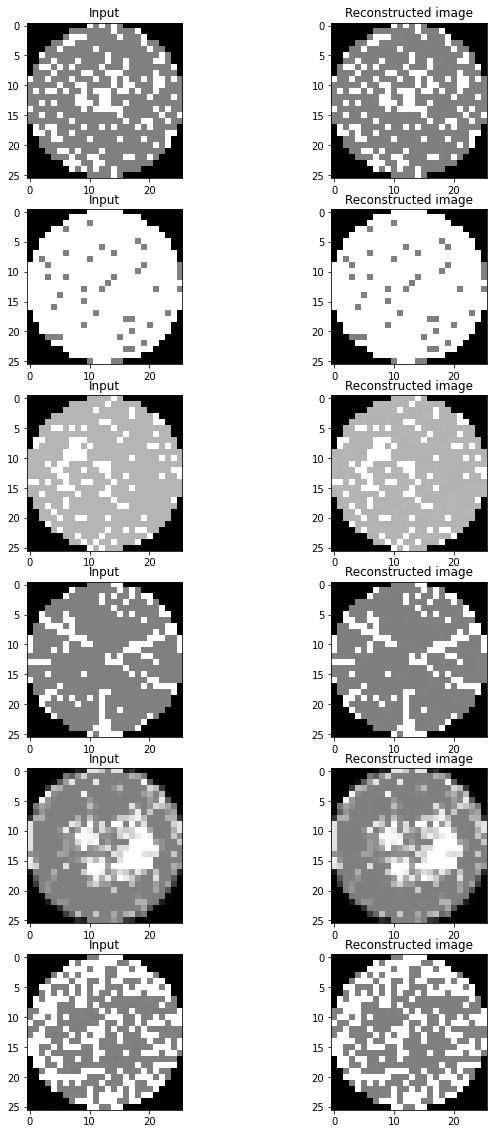

In [102]:
#Printing the results using train data
train_op = enumerate(train_loader)
batch_idx, (input, pattern) = next(train_op)

with torch.no_grad():
    optimizer.zero_grad()
    input  = input.to(device)
    input =  input.view(-1,1,26,26)
    input =  input.float()
    encoded, decoded = autoencoder(input)
    print("encoded shape",encoded.shape)
    print("Decoded Shape", decoded.shape)
    #loss = loss_function(torch.reshape(decoded,(batch_size_train, 1,26,26)), torch.reshape(input,(batch_size_val,1,26,26)))
    loss = loss_function(decoded, input)
    #input =  input.view(batch_size_train,1,26,26)
    #decoded = decoded.view(batch_size_train,1,26,26)
    
    plt.figure(figsize=(10,20))
    for i in range(len(input)):
      plt.subplot(len(input),2,(2*i+1))
      plt.imshow(input[i][0].cpu(),cmap = 'gray' )
      plt.title("Input")
      plt.subplot(len(input),2,(2*i+2))
      plt.imshow(decoded[i][0].cpu(),cmap = 'gray' )
      plt.title("Reconstructed image")
    
#plt.savefig("fig_name.png")
#,cmap = 'gray'

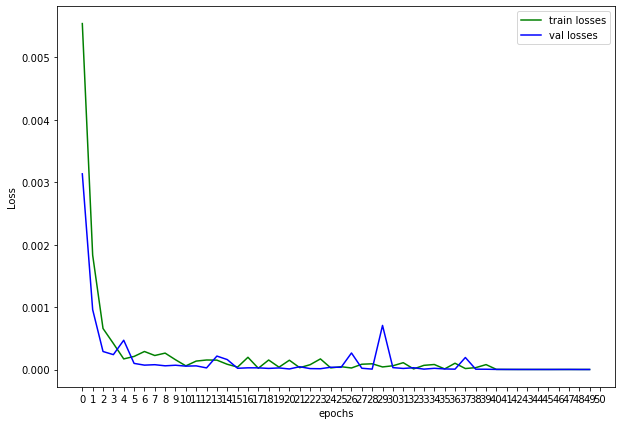

In [103]:
#Loss graph plotting
plt.figure(figsize=(10, 7))

plt.plot(epoch_loss_train, color='green', label='train losses')
plt.plot(epoch_loss_val, color='blue', label='val losses')
plt.xticks(range(Epoch+1))
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend()

plt.savefig('F:\Chrome downloads\loss_graph.png')
plt.show()


In [104]:
torch.save(autoencoder.state_dict(), "./convautoencoder_jan17.pt")

In [105]:
autoencoder = convautoencoder()

In [106]:
autoencoder.load_state_dict(torch.load("./convautoencoder_jan17.pt", map_location=device))#,strict=False)

<All keys matched successfully>

In [107]:
autoencoder = autoencoder.to(device)

In [108]:
encoder_list = []
pattern_list =[]

#no_features = 10
       
for (input, pattern) in Data_tensor_list:
    encoder, _ = autoencoder(input.view(-1,1,26,26).float().to(device))
    no_features = encoder.shape[1]
    encoder = encoder.detach().cpu().numpy().reshape(-1, no_features)
    pattern = pattern.cpu().numpy().reshape(-1,1)
    encoder_list.append(encoder)
    pattern_list.append(pattern)

In [109]:
print(len(encoder_list))
print(len(pattern_list))
print(encoder_list[1].shape)
print(pattern_list[1].shape)

req_data = np.concatenate( encoder_list, axis=0 )
pattern_data  = np.concatenate( pattern_list, axis=0 )

9945
9945
(1, 10)
(1, 1)


In [110]:
print(req_data.shape)
print(pattern_data.shape)

(9945, 10)
(9945, 1)


In [111]:
#print(req_data[0])

In [112]:
print(req_data.shape)

(9945, 10)


22894
(22894, 26, 26)
<class 'list'>


/home/sathvik/.conda/envs/sathvik/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


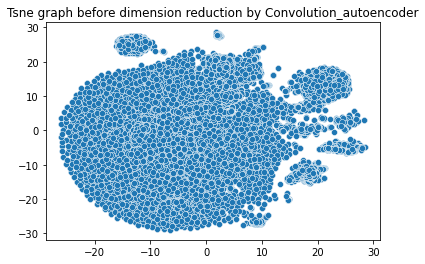

In [113]:
#visualizing the high dimension data without dimension reduction
Data_h_dim =[]

for img in df4['normalized_wafer']:
    Data_h_dim.append(resize(img, (26, 26)))
   
print(len(Data_h_dim))
print(np.array(Data_h_dim).shape)
print(type(Data_h_dim))
  


from sklearn.manifold import TSNE
m = TSNE(learning_rate = 50)

data = np.array(Data_h_dim).reshape(-1, 676)

tsne_features = m.fit_transform(data)

import seaborn as sns
sns.scatterplot(x=tsne_features[:,0], y =tsne_features[:,1])
plt.title("Tsne graph before dimension reduction by Convolution_autoencoder")
plt.show()
#plt.savefig("Tsne graph before dim red by Convolution autoencoder")

/home/sathvik/.conda/envs/sathvik/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


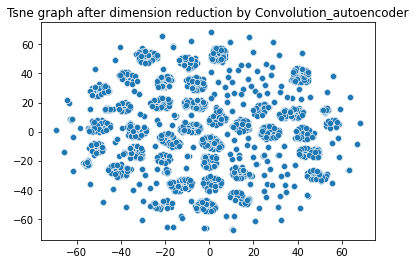

In [114]:
# Visualizing high dim data after dimension reduction by autoencoder.
from sklearn.manifold import TSNE

m = TSNE(learning_rate = 50)

tsne_features = m.fit_transform(req_data)

import seaborn as sns
sns.scatterplot(x=tsne_features[:,0], y =tsne_features[:,1])
plt.title("Tsne graph after dimension reduction by Convolution_autoencoder")
plt.show()
#plt.savefig("Tsne graph after dim reduction by Convolution_autoencoder.png")


In [116]:
#Elbow method to find the best value of K
# wss - Within Cluster Sum of Squared
no_of_clusters = range(2,20,1)
wss = []

for i in no_of_clusters:
    kmeans = KMeans(n_clusters=i, random_state= 10)
    y_predicted = kmeans.fit(req_data)
    u = kmeans.inertia_
    wss.append(u)
    print(" The inertia for :", i, "Cluster is :", u)

 The inertia for : 2 Cluster is : 532064.1875
 The inertia for : 3 Cluster is : 447702.96875
 The inertia for : 4 Cluster is : 371781.15625
 The inertia for : 5 Cluster is : 320338.46875
 The inertia for : 6 Cluster is : 290896.8125
 The inertia for : 7 Cluster is : 260979.859375
 The inertia for : 8 Cluster is : 241969.15625
 The inertia for : 9 Cluster is : 225205.15625
 The inertia for : 10 Cluster is : 216755.046875
 The inertia for : 11 Cluster is : 201534.0625
 The inertia for : 12 Cluster is : 192383.875
 The inertia for : 13 Cluster is : 183318.234375
 The inertia for : 14 Cluster is : 169961.109375
 The inertia for : 15 Cluster is : 165504.1875
 The inertia for : 16 Cluster is : 155409.015625
 The inertia for : 17 Cluster is : 142793.125
 The inertia for : 18 Cluster is : 138647.765625
 The inertia for : 19 Cluster is : 127156.1484375


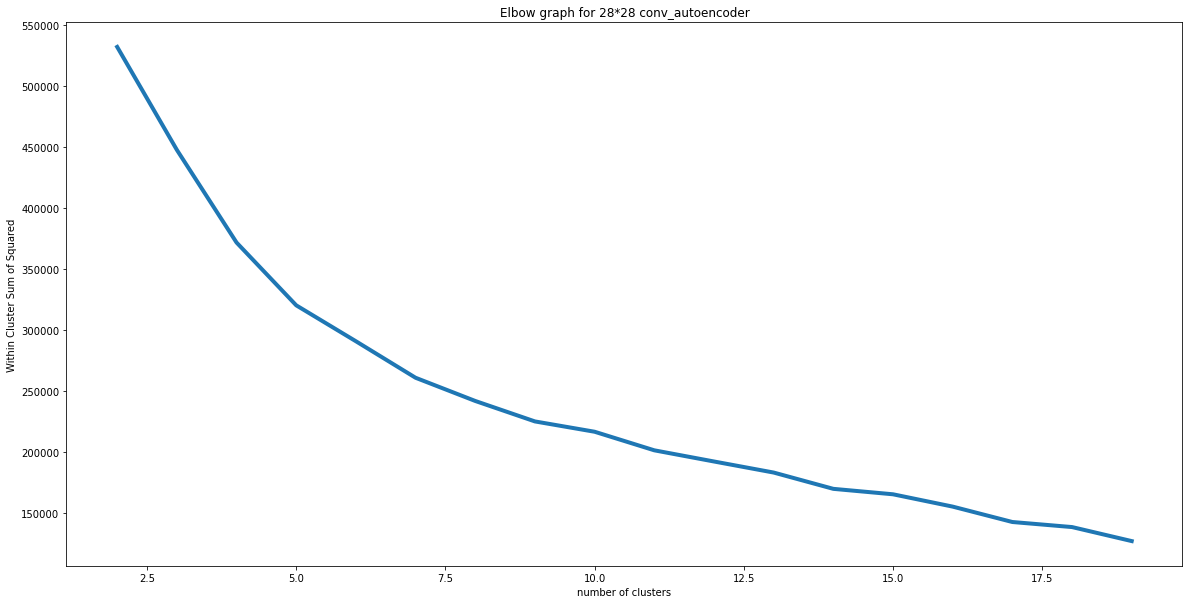

In [117]:
plt.figure(figsize=(20,10))
plt.plot(no_of_clusters, wss, linewidth=4)
plt.xlabel("number of clusters")
plt.ylabel("Within Cluster Sum of Squared")
plt.title("Elbow graph for 28*28 conv_autoencoder")
plt.savefig("Elbow graph_for_convautoencoder_dim_red")

#value of k is selected as 6 ( less than actual, since only >= 26*26 taken)

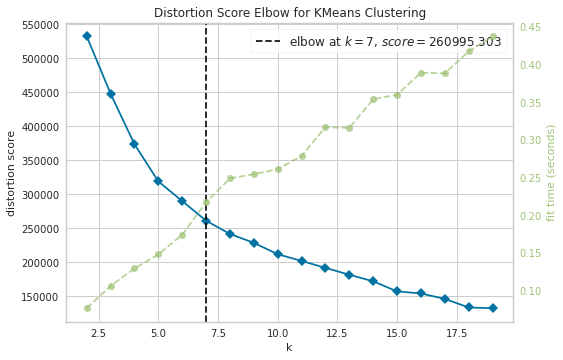

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(np.array(req_data))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

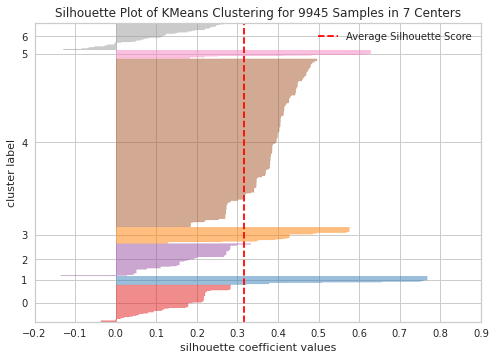

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 9945 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [125]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(np.array(req_data))    # Fit the data to the visualizer
visualizer.poof()  

In [122]:
for i in list(range(2, 20)):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state= 10)
    y_predicted = kmeans.fit_predict(req_data)
    silhouette = metrics.silhouette_score(req_data, y_predicted)
    print(" for",i,"no of clusters, silhouette score = ", silhouette )
#Slihouette score first increase and then starts to decrease, this transition
#point is another method to verfiy number of clusters apart from elbow method.

 for 2 no of clusters, silhouette score =  0.6628691
 for 3 no of clusters, silhouette score =  0.6551991
 for 4 no of clusters, silhouette score =  0.36788988
 for 5 no of clusters, silhouette score =  0.38043433
 for 6 no of clusters, silhouette score =  0.4279614
 for 7 no of clusters, silhouette score =  0.435323
 for 8 no of clusters, silhouette score =  0.24415018
 for 9 no of clusters, silhouette score =  0.27502942
 for 10 no of clusters, silhouette score =  0.23980638
 for 11 no of clusters, silhouette score =  0.2581204
 for 12 no of clusters, silhouette score =  0.28754425
 for 13 no of clusters, silhouette score =  0.3088795
 for 14 no of clusters, silhouette score =  0.2791785
 for 15 no of clusters, silhouette score =  0.29949218
 for 16 no of clusters, silhouette score =  0.31301892
 for 17 no of clusters, silhouette score =  0.29517794
 for 18 no of clusters, silhouette score =  0.30057302
 for 19 no of clusters, silhouette score =  0.32461506


In [126]:
num_of_clusters = 7
kmeans = KMeans(n_clusters=num_of_clusters,init = 'k-means++', random_state= 10)
y_predicted = kmeans.fit_predict(req_data)
y_predicted
print(len(y_predicted))
print(type(y_predicted))


9945
<class 'numpy.ndarray'>


In [ ]:
print(y_predicted[:100])

In [127]:
from sklearn import metrics

silhouette = metrics.silhouette_score(req_data, y_predicted)
print(silhouette)

0.435323


In [ ]:
img =[]
label =[]
kmeans_label =[]

for i in range(len(req_data)):
    img.append(final_bal_data[i][0].copy())
      
    label.append(pattern_data [i])
    
    kmeans_label.append(y_predicted[i])
    
zip_ = list(zip(img, label, kmeans_label))
print(len(zip_))

In [ ]:
clusters = [x for x in range(num_of_clusters)]

cluster_list =[]
for i in clusters:
    globals()[f"cluster_{i}"] = []
    for index, (img, fail, k_cluster) in enumerate(zip_):
        if k_cluster == i:
            globals()[f"cluster_{i}"].append((img, fail, k_cluster))
    cluster_list.append(globals()[f"cluster_{i}"] )

for i in clusters:
    print(f"no of images in the cluster_{i}", len( globals()[f"cluster_{i}"]))            
            
    

In [ ]:
list_of_unique =[]
for i in range(len(cluster_list)):
    globals()[f"Unique_failure_cluster_{i}"] = []
    globals()[f"Unique_complete_data_cluster_{i}"] = []
    for (image,failure_type, k_label) in globals()[f"cluster_{i}"] :
        if failure_type not in globals()[f"Unique_failure_cluster_{i}"]:
            globals()[f"Unique_failure_cluster_{i}"].append(int(failure_type))
            globals()[f"Unique_complete_data_cluster_{i}"].append((image,int(failure_type), k_label))
    list_of_unique.append(globals()[f"Unique_complete_data_cluster_{i}"])
    
for i in range(len(cluster_list)):
    print( globals()[f"Unique_failure_cluster_{i}"])

In [ ]:
print(len(globals()[f"Unique_failure_cluster_{i}"])) 
print(len(globals()[f"Unique_complete_data_cluster_{i}"]))

for i in globals()[f"Unique_complete_data_cluster_{i}"]:
    print(len(i))

In [ ]:
plt.figure(figsize=(10,10)) # specifying the overall grid size
for j in list_of_unique :
    for i in range(len(j)):
        plt.subplot(1,len(j),i+1)    # the number of images in the grid is 5*5 (25)
        plt.imshow(j[i][0])

    plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 7))

for i in range(len(globals()[f"Unique_complete_data_cluster_{i}"])):
    fig.add_subplot(1, len(globals()[f"Unique_complete_data_cluster_{i}"], i+1)
    plt.imshow()
    plt.axis()
    

In [ ]:
print(type(y_predicted))
unique, counts = np.unique(y_predicted, return_counts=True)
print(unique)
print(counts)
sorted_array = np.sort(counts)
print(sorted_array)
print(sorted_array[-1])

In [ ]:
def augment(image, pattern, new_label, bal_result):
    bal_result.append((image, pattern, new_label))
    bal_result.append((rotate(image, angle= 90), pattern, new_label ))
    bal_result.append((rotate(image, angle= 180), pattern, new_label))
    bal_result.append((rotate(image, angle= 270), pattern, new_label))
    bal_result.append((np.fliplr(image), pattern, new_label))
    bal_result.append((np.flipud(image), pattern, new_label)) #Up Down Flipped
    bal_result.append((random_noise(image,var=0.005**2), pattern, new_label))
    bal_result.append((ndimage.uniform_filter(image, size=0.3),pattern, new_label))
    bal_result.append((exposure.adjust_gamma(image, gamma=0.3,gain=1), pattern, new_label))  #bright image
    bal_result.append((exposure.adjust_gamma(image, gamma=0.5,gain=1), pattern, new_label))
    bal_result.append((exposure.adjust_gamma(image, gamma=1,gain =1), pattern, new_label))     #dark image
    bal_result.append((exposure.adjust_gamma(image, gamma=1.5,gain =1), pattern, new_label))  #darker image
    bal_result.append((random_noise(image,var=0.005**2), pattern, new_label))
    return bal_result

In [ ]:
from skimage.transform import rotate
from skimage import exposure
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

data_label_list =[]
for i in unique:
    globals()[f"result_data_{i}"] = []
    for index, (img, fail, k_cluster) in enumerate(zip_):
        image = img
        pattern =  fail
        k_label =  k_cluster
        #print(k_label)
        if k_label == i:
            while len( globals()[f"result_data_{i}"]) <= sorted_array[-1]:
                augment(image, pattern, k_label, globals()[f"result_data_{i}"])
    print(f"for k_label {i}")
    print(len(globals()[f"result_data_{i}"]))
    data_label_list.append(globals()[f"result_data_{i}"])
    
         

    
    

In [ ]:
print(len(data_label_list))

In [ ]:
bal_result_data = [y for x in data_label_list for y in x]



In [ ]:
print(len(bal_result_data))

print(bal_result_data[0][0].shape)
plt.imshow(bal_result_data[0][0])

In [ ]:
import random

random.shuffle(bal_result_data )



In [ ]:
print(bal_result_data[0][0].shape)
plt.imshow(bal_result_data[0][0])

In [ ]:
print(bal_result_data[0][0].shape)


    Classifier Model
    

In [ ]:

batch_size_train = 5
batch_size_test = 5
batch_size_val =5
momentum = 0.5
log_interval = 10
random_seed = 2
torch.manual_seed(random_seed) 

In [ ]:

tensor_transform = transforms.ToTensor()
resize = transforms.Resize((26,26))

image_tensor_clfy =[]
failure_num_tensor =[]
clustering_labels_tensor =[] 

#print(final_bal_data[0][0].shape)


for i in range(len(bal_result_data)):
    image = tensor_transform(bal_result_data[i][0].copy())
    image = resize(image)
    image_tensor_clfy.append(image)
      
    true_label = torch.tensor(float(bal_result_data[i][1]))
    failure_num_tensor.append(true_label)
    
    new_label =  torch.tensor(float(bal_result_data[i][2]))
    clustering_labels_tensor.append(new_label)
 


In [ ]:
print(len(image_tensor_clfy))
print(len(failure_num_tensor))
print(len(clustering_labels_tensor ))

In [ ]:
print(bal_result_data[0][2])

In [ ]:
print(len(image_tensor_clfy))
print(len(failure_num_tensor))
print(len(clustering_labels_tensor))

In [ ]:
zip_data = list(zip(image_tensor_clfy, failure_num_tensor, clustering_labels_tensor))

In [ ]:
train_data_classifier, val_data_classifier = train_test_split(zip_data, test_size=0.3, random_state=48)

In [ ]:
train_loader_classifier = Data.DataLoader(dataset=train_data_classifier, batch_size=batch_size_train, shuffle=True)
val_loader_classifier = Data.DataLoader(dataset=val_data_classifier, batch_size=batch_size_val, shuffle=True)


In [ ]:
print(len(train_data_classifier))
print(len(val_data_classifier))


In [ ]:
class classifier_net(nn.Module):
    def __init__(self):
        super(classifier_net, self).__init__()
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p=0.2)
        self.fc1 = nn.Linear(676, 700)
        self.fc2 = nn.Linear(700,800)
        self.fc3 = nn.Linear(800, 1000)
        self.fc4 = nn.Linear(1000, 1200)
        self.fc5 = nn.Linear(1200, 1400)
        self.fc6 = nn.Linear(1400, 1100)
        self.fc7 = nn.Linear(1100, 900)
        self.fc8 = nn.Linear(900, 700)
        self.fc9 = nn.Linear(700, 500)
        self.fc10 = nn.Linear(500, 300)
        self.fc11 = nn.Linear(300, 100)
        self.fc12 = nn.Linear(100, 50)
        self.fc13 = nn.Linear(50, num_of_clusters)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.drop(self.relu(self.fc4(x)))
        x = self.relu(self.fc5(x))
        x = self.drop(self.relu(self.fc6(x)))
        x = self.relu(self.fc7(x)) 
        x = self.drop(self.relu(self.fc8(x))) 
        x = self.relu(self.fc9(x)) 
        x = self.drop(self.relu(self.fc10(x))) 
        x = self.relu(self.fc11(x)) 
        x = self.drop(self.relu(self.fc12(x))) 
        x = self.relu(self.fc13(x)) 
        return x
# return F.log_softmax(x)



In [ ]:
classifier = classifier_net().to(device)
print(classifier)

In [ ]:
#optimizer and loss function
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
#criterion = nn.CrossEntropyLoss(weight=torch.tensor([1,1.7,27.2,3.31 ,1.61]).to(device))
optimizer = optim.Adam(classifier.parameters(), lr = learning_rate)
#optimizer = optim.Adam(classifier.parameters(), lr = learning_rate, weight_decay = 2e-5 )
#weight_decay = 1e-5, regualrization hyperparameter.
#optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.9)

In [ ]:
Epoch = 30
for epoch in range(Epoch):
    train_loss =[]
    total_correct =0.0
    running_loss = 0.0
    classifier.train()
    for index, (image, true_label, cluster_label) in enumerate(train_loader_classifier):
        image = image.reshape(-1,1*26*26)
        image = image.to(device)
        image = image.float()
        true_label =true_label.to(torch.long).to(device)
        cluster_label = cluster_label.to(torch.long).to(device)
        output = classifier(image)
        output_idx = torch.argmax(output, dim = 1)
        #_ , output_idx = torch.max(output, 1)
        total_correct += torch.sum(cluster_label == output_idx )
        #print(cluster_label , output_idx, total_correct)
        optimizer.zero_grad()
        loss = criterion(output, cluster_label)
        train_loss.append(loss.cpu())
        running_loss += loss.item() 
        loss.backward()
        optimizer.step()
        #print((index/len(train_loader_classifier))*100)
    print("Total train correct", total_correct)
    epoch_train_loss = (running_loss / len(train_data_classifier))
    epoch_train_acc = (total_correct/(len(train_data_classifier)))*100
    print(f" ==================>Training Epoch: {epoch} loss: {epoch_train_loss} Accuracy : { epoch_train_acc}%")
    
    classifier.eval()
    total_correct =0.0
    running_loss = 0.0
    for index, (image, true_label, cluster_label) in enumerate(val_loader_classifier):
        image = image.reshape(-1,1*26*26)
        image = image.to(device)
        image = image.float()
        true_label =true_label.to(torch.long).to(device)
        cluster_label = cluster_label.to(torch.long).to(device)
        output = classifier(image)
        #output_idx = torch.argmax(output, dim = 1)
        _ , output_idx = torch.max(output, 1)
        total_correct += torch.sum(cluster_label == output_idx )
        #optimizer.zero_grad()
        loss = criterion(output, cluster_label)
        running_loss += loss.item()
        #print(output , output_idx,  cluster_label,  total_correct )
    print("Total validation correct: ", total_correct)
    epoch_val_loss = (running_loss / len(val_data_classifier))
    epoch_val_acc = (total_correct/len(val_data_classifier))*100
    print(f" ========================>Validation Epoch: {epoch} loss:{epoch_val_loss} Accuracy : { epoch_val_acc}%")
    
    
#print("Training Completed")

In [ ]:
torch.save(classifier.state_dict(), "./classifier_conv_jan_17.pt")

In [ ]:
classifier = classifier_net()

In [ ]:
classifier .load_state_dict(torch.load("./classifier_conv_jan_17.pt", map_location=device))#,strict=False)

In [ ]:
classifier = classifier.to(device)

In [ ]:
image_list =[]
net_output_cluster_label = []
failure_label = []
kmean_label =[]

for i, (image ,true_label, cluster_label) in enumerate(train_loader_classifier):
    image = image.reshape(-1,1*26*26)
    image = image.to(device)
    image = image.float()
    true_label = true_label.to(torch.long).to(device)
    cluster_label = cluster_label.to(torch.long).to(device)
    
    output = classifier(image)
    output_idx = torch.argmax(output, dim = 1)
     
    image_list.append(image.reshape(-1,1,26,26).detach().cpu().numpy())    
    net_output_cluster_label.append(output_idx.reshape(-1,1).detach().cpu().numpy())
    failure_label.append(true_label.cpu().numpy())
    kmean_label.append(cluster_label.cpu().numpy())

    

In [ ]:
print(len(image_list))
print(len(net_output_cluster_label))
print(len(failure_label))
print(len(kmean_label))

In [ ]:
print(image_list[0].shape)
print(net_output_cluster_label[0])
print(failure_label[0].shape)
print(kmean_label[0].shape)

In [ ]:
ip_img = np.concatenate(image_list, axis=0 )
net_op_as_cluster = np.concatenate(net_output_cluster_label, axis=0 )
true_failure_type = np.concatenate(failure_label , axis=0 )
cluster_failure_type = np.concatenate(kmean_label, axis = 0)
print(len(ip_img))
print(len(net_op_as_cluster))
print(len(true_failure_type))
print(len(cluster_failure_type))

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(cluster_failure_type ,net_op_as_cluster)

print(cf_matrix)

In [ ]:
images = np.concatenate(image_list, axis=0 )
classifier_op = np.concatenate(net_output, axis=0 )
failure_data  = np.concatenate(failure_label, axis=0 )
cluster_data  = np.concatenate(clustering_label, axis=0 )

print(len(images))
print(len(classifier_op))
print(len(failure_data))
print(len(cluster_data))

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(cluster_data ,classifier_op)

print(cf_matrix)

In [ ]:
#VGG Classifier model

In [ ]:
transform = transforms.Compose([
    #transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(p=0.5)
])


image_tensor_clfy_vgg =[]
failure_num_tensor_vgg =[]
clustering_labels_tensor_vgg =[] 

for i in range(len(df5)):
    image = transform(df_balanced["image_tensor"][i])
    image_tensor_clfy_vgg.append(image)
    
    true_label = torch.tensor(float(df_balanced["failure_num"][i]))
    failure_num_tensor_vgg.append(true_label)
    
    new_label =  torch.tensor(float(df_balanced["clustering_label"][i]))
    clustering_labels_tensor_vgg.append(new_label)
    


In [ ]:
rgb_imgs =[]
for img in image_tensor_clfy:
    rgb_img = img.repeat(3,1,1)
    rgb_imgs.append(rgb_img)
print(len(rgb_imgs))   

In [ ]:
zip_data = list(zip(rgb_imgs, failure_num_tensor, clustering_labels_tensor))


In [ ]:
train_data_classifier, remaining_data_classifier = train_test_split(zip_data, test_size=0.2, random_state=42)

In [ ]:
val_data_classifier, test_data_classifier = train_test_split(remaining_data_classifier, test_size=0.5, random_state=42)

In [ ]:
print(len(train_data_classifier))
print(len(val_data_classifier))
print(len(test_data_classifier))

In [ ]:
train_loader_classifier = Data.DataLoader(dataset=train_data_classifier, batch_size=batch_size_train, shuffle=True)
val_loader_classifier = Data.DataLoader(dataset=val_data_classifier, batch_size=batch_size_val, shuffle=True)
test_loader_classifer = Data.DataLoader(dataset=test_data_classifier, batch_size=batch_size_test, shuffle=True)


In [ ]:
#Importing the pre-trained VGG16 model
import torchvision.models as models

vgg_model = models.vgg16(pretrained=True)
print(vgg_model)

In [ ]:
num_features = vgg_model.classifier[6].in_features
print(num_features)

vgg_model.classifier[6].out_features = 5

# Freeze convolution weights
for param in vgg_model.features.parameters():
    param.requires_grad = False

# Sending the model to the device (CPU/GPU)
vgg_model.to(device)

In [ ]:
#setting up the loss function and the optimizer.
criterion = nn.CrossEntropyLoss()

#optimizer = optim.SGD(vgg_model.parameters(), lr = 0.001, momentum = 0.9)

#criterion = nn.CrossEntropyLoss(weight=torch.tensor([1,1.7,27.2,3.31 ,1.61]).to(device)) 
optimizer = optim.Adam(classifier.parameters(), lr = learning_rate, weight_decay = 2e-5 )
#weight_decay = 1e-5, regualrization hyperparameter.
#optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.9)

In [ ]:
Epoch = 50

for epoch in range(Epoch):
    train_loss =[]
    total_correct =0.0
    running_loss = 0.0
    classifier.train()
    for index, (image, true_label, cluster_label) in enumerate(train_loader_classifier):
        image = image.to(device)
        image = image.float()
        true_label =true_label.to(torch.long).to(device)
        cluster_label = cluster_label.to(torch.long).to(device)
        output = vgg_model(image)
        #print(output.max())
        output_idx = torch.argmax(output, dim = 1)
        #_ , output_idx = torch.max(output, 1)
        total_correct += torch.sum(cluster_label == output_idx )
        #print(output , output_idx,  cluster_label,  total_correct )
        optimizer.zero_grad()
        loss = criterion(output, cluster_label)
        train_loss.append(loss.item())
        running_loss += loss.item() 
        loss.backward()
        optimizer.step()
    print("Total train correct", total_correct)
    epoch_train_loss = (running_loss / len(train_data_classifier))
    epoch_train_acc = (total_correct/(len(train_data_classifier)))*100
    print(f" Training Epoch: {epoch} loss: {epoch_train_loss} Accuracy : { epoch_train_acc}%")
    
    classifier.eval()
    total_correct =0.0
    running_loss = 0.0
    for index, (image, true_label, cluster_label) in enumerate(val_loader_classifier):
        image = image.to(device)
        image = image.float()
        true_label =true_label.to(torch.long).to(device)
        cluster_label = cluster_label.to(torch.long).to(device)
        output =  vgg_model(image)
        #output_idx = torch.argmax(output, dim = 1)
        _ , output_idx = torch.max(output, 1)
        total_correct += torch.sum(cluster_label == output_idx )
        #optimizer.zero_grad()
        loss = criterion(output, cluster_label)
        running_loss += loss.item()
        #print(output , output_idx,  cluster_label,  total_correct )
    print("Total validation correct: ", total_correct)
    epoch_val_loss = (running_loss / len(val_data_classifier))
    epoch_val_acc = (total_correct/len(val_data_classifier))*100
    print(f" ====>Validation Epoch: {epoch} loss:{epoch_val_loss} Accuracy : { epoch_val_acc}%")
    
    
#print("Training Completed")